Dataset contains artificially created ban information. Designed to mimic a realistic scenario where a bank identifies reason for customer churn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


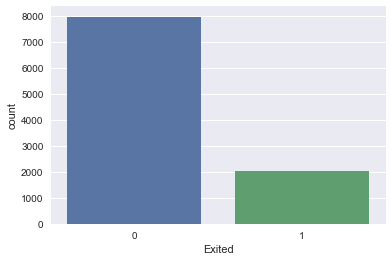

In [5]:
sns.countplot(df['Exited'])

In [6]:
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1).values

In [7]:
y = df['Exited'].values

In [8]:
X[:5]

array([[619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
       [608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63],
       [850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1]], dtype=object)

In [9]:
y[:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [11]:
# labels country data
label_encoder_X_1 = LabelEncoder()
X[:, 1] = label_encoder_X_1.fit_transform(X[:,1])
# France = 0, Spain = 2, Germany = 1

# labels gender data
label_encoder_X_2 = LabelEncoder()
X[:, 2] = label_encoder_X_2.fit_transform(X[:,2])

# female = 0, male = 1

# adds dummy variable for country data
onehotencoder = OneHotEncoder(categorical_features=[1])
X = onehotencoder.fit_transform(X).toarray()

# remove one column of dummy variables to avoid trap
X = X[:, 1:]

In [12]:
X.shape

(10000, 11)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
# y_train = y_train.flatten()
# y_test = y_test.flatten()

In [18]:
import keras

Using TensorFlow backend.


In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [20]:
clf = Sequential()

In [21]:
# input layer and first hidden layer
# units -> avg. of # of nodes in input layer and number of nodes in output layer
#   (11 + 1) / 2 = 6 -> ~12 inputs, 2 outputs

# rectifier activation function
clf.add(Dense(units=6, kernel_initializer="uniform", activation="relu", input_dim=11))

In [22]:
clf.add(Dense(units=6, kernel_initializer="uniform", activation="relu"))

In [23]:
clf.add(Dense(1, kernel_initializer="uniform", activation="sigmoid"))

In [24]:
# optimizer to change weights - apply stochastic gradient descent
clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
clf.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
8000/8000 [==============================] - 3s - loss: 0.4838 - acc: 0.7952       

In [26]:
# compute customer churn probability
y_pred = clf.predict(X_test)

In [27]:
y_pred[:5]

array([[ 0.16780153],
       [ 0.36349246],
       [ 0.16514887],
       [ 0.05759344],
       [ 0.15482497]], dtype=float32)

In [28]:
y_pred = (y_pred > 0.5)

In [29]:
y_pred[:10]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True]], dtype=bool)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [31]:
cm = confusion_matrix(y_test, y_pred)

In [32]:
cm

array([[1544,   51],
       [ 264,  141]])

In [33]:
accuracy_score(y_test, y_pred)

0.84250000000000003

In [34]:
# need double pair of brackets -> creates 2d array
# data needs to be on the same scale as the trained data
new_prediction = clf.predict(
    sc.transform(np.array([[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]))
)

C:\Users\johna\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [35]:
new_prediction = (new_prediction > 0.5)

In [36]:
new_prediction

array([[False]], dtype=bool)

In [20]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [21]:
def create_model():
    model = Sequential()
    model.add(Dense(units=6, kernel_initializer="uniform", activation="relu", input_dim=11))
    #clf.add(Dropout(p=0.1))
    model.add(Dense(units=6, kernel_initializer="uniform", activation="relu"))
    #clf.add(Dropout(p=0.1))
    model.add(Dense(1, kernel_initializer="uniform", activation="sigmoid"))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [22]:
classifier = KerasClassifier(build_fn=create_model, batch_size=10, epochs=100, verbose=0)

In [23]:
scores = cross_val_score(classifier, X=X_train, y=y_train, cv=5, n_jobs=1)

In [24]:
scores.mean()

0.8377499947324395

In [25]:
scores.std()

0.012397075161935936

In [26]:
from sklearn.model_selection import GridSearchCV

In [28]:
parameters = {'batch_size': [25, 32],
               'epochs': [100, 200],
               'optimizer': ['adam', 'rmsprop']}

In [29]:
# Parameter tuning
# grid_search = grid_search.fit(X_train, y_train)
# best_parameters = grid_search.best_params_
# best_accuracy = grid_search.best_score_